In [3]:
%pwd

'/home/vinay/fastai'

In [4]:
!ls


bulldozer_real.ipynb		practice_bulldozers.ipynb
CODE-OF-CONDUCT.md		pytorch_practice.ipynb
courses				README.md
deeplearning_practice1.ipynb	README.rst
dog_breed_identification.ipynb	requirements.txt
environment.yml			setup.cfg
fastai				setup.py
LICENSE				some_datascience.ipynb
MANIFEST			tutorials
MANIFEST.in


In [5]:
PATH = '/home/vinay/fastai/courses/dl1/data/dogbreeds/'

In [6]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.imports import *

In [7]:
from fastai.conv_learner import *
from fastai.model import *
from fastai.plots import *
from fastai.transforms import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.torch_imports import *

In [8]:
bs = 58
sz = 224
arch = resnext101_64
label_csv = f'{PATH}labels.csv'

In [9]:
label_csv

'/home/vinay/fastai/courses/dl1/data/dogbreeds/labels.csv'

In [10]:
n = len(list(open(label_csv)) )- 1

In [11]:
n

10222

In [12]:
val_idxs = get_cv_idxs(n)

In [13]:
!ls {PATH}

labels.csv  sample_submission.csv  test  tmp  train


In [14]:
data = pd.read_csv(label_csv)

In [15]:
data.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [16]:
data.pivot_table(index = 'breed',aggfunc=len).sort_values('id',ascending = False)

,id
breed,
scottish_deerhound,126
maltese_dog,117
afghan_hound,116
entlebucher,115
bernese_mountain_dog,114
shih-tzu,112
great_pyrenees,111
pomeranian,111
basenji,110


In [18]:
#so there are 120 different breeds
tfms = tfms_from_model(arch ,sz,aug_tfms = transforms_side_on,max_zoom = 1.1)
data = ImageClassifierData.from_csv(PATH,'train',f'{PATH}labels.csv',
                                    tfms = tfms,bs = bs,suffix = '.jpg',val_idxs = val_idxs,test_name='test')

In [19]:
fn = PATH+data.trn_ds.fnames[0]

In [20]:
fn

'/home/vinay/fastai/courses/dl1/data/dogbreeds/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg'

In [21]:
img = PIL.Image.open(fn)

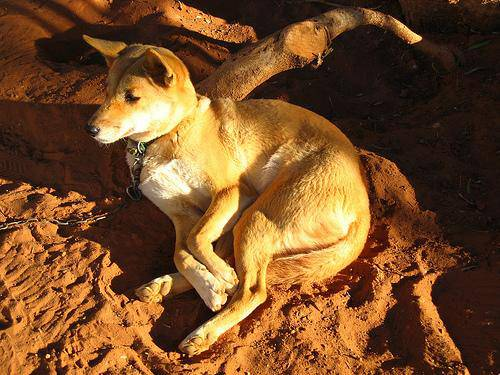

In [22]:
img

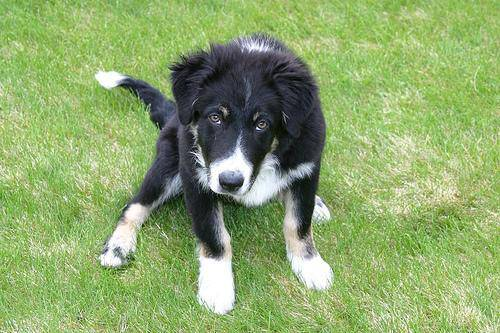

In [23]:
fn = PATH+data.trn_ds.fnames[100]
PIL.Image.open(fn)

In [24]:
#now let's check the size of these images,we don't want them too big or small
img.size

(500, 375)

In [25]:
#now let's create a dict of sizes

size_d = {k: PIL.Image.open(PATH+k).size for k in data.trn_ds.fnames}

In [26]:
row_sz,col_sz = list(zip(*size_d.values()))

In [27]:
len(list(zip(*size_d.values())))

2

In [28]:
row_sz = np.array(row_sz)
col_sz = np.array(col_sz)

(array([3023., 5024.,   92.,   15.,    5.,    3.,   13.,    2.,    0.,    1.]),
 array([  97. ,  413.7,  730.4, 1047.1, 1363.8, 1680.5, 1997.2, 2313.9, 2630.6, 2947.3, 3264. ]),
 <a list of 10 Patch objects>)

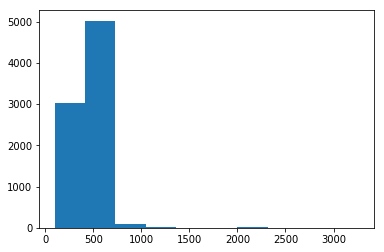

In [29]:
plt.hist(row_sz)

In [42]:
def get_data(sz,bs):
    tfms = tfms_from_model(arch ,sz,aug_tfms = transforms_side_on,max_zoom = 1.1)
    data = ImageClassifierData.from_csv(PATH,'train',f'{PATH}labels.csv',
                                    tfms = tfms,bs = bs,suffix = '.jpg',val_idxs = val_idxs,test_name='test')
    return data if sz>300 else data.resize(340,'tmp')
    

In [45]:
data = get_data(sz,bs)
learn = ConvLearner.pretrained(arch,data,precompute = True)
learn.fit(1e-2,5)

HBox(children=(IntProgress(value=0, max=6), HTML(value='')))


100%|██████████| 179/179 [01:54<00:00,  1.57it/s]


HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch:   0, train_loss: 0.918241, val_loss: 0.371955, accuracy: 0.909962
epoch:   1, train_loss: 0.429105, val_loss: 0.294172, accuracy: 0.916188
epoch:   2, train_loss: 0.291959, val_loss: 0.268298, accuracy: 0.920498
epoch:   3, train_loss: 0.224885, val_loss: 0.248338, accuracy: 0.928640
epoch:   4, train_loss: 0.186206, val_loss: 0.243124, accuracy: 0.922893



In [46]:
#we see validation loss is still decreasing...
learn.save('224_pre')
learn.load('224_pre')

In [47]:
learn.set_data(get_data(299,bs))

HBox(children=(IntProgress(value=0, max=6), HTML(value='')))

In [48]:
learn.freeze()
learn.fit(1e-2,3,cycle_len = 1,cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch:   0, train_loss: 0.139191, val_loss: 0.234816, accuracy: 0.925766
epoch:   1, train_loss: 0.143094, val_loss: 0.232665, accuracy: 0.929119
epoch:   2, train_loss: 0.116960, val_loss: 0.232411, accuracy: 0.926724
epoch:   3, train_loss: 0.111140, val_loss: 0.232126, accuracy: 0.928161
epoch:   4, train_loss: 0.105955, val_loss: 0.229104, accuracy: 0.929119
epoch:   5, train_loss: 0.083278, val_loss: 0.227026, accuracy: 0.928640
epoch:   6, train_loss: 0.079955, val_loss: 0.228513, accuracy: 0.929119



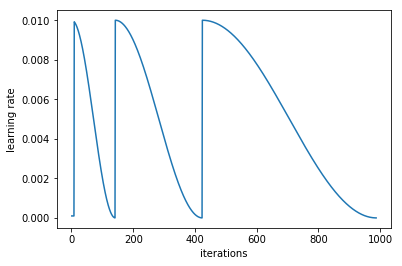

In [49]:
learn.sched.plot_lr()

In [38]:
#now let's try not using validation set and actually try to predict the optimal learnig rate
def get_data(sz,bs):
    tfms = tfms_from_model(arch ,sz,aug_tfms = transforms_side_on,max_zoom = 1.1)
    data = ImageClassifierData.from_csv(PATH,'train',f'{PATH}labels.csv',
                                    tfms = tfms,bs = bs,suffix = '.jpg',val_idxs = val_idxs,test_name='test')
    return data if sz>300 else data.resize(340,'tmp')


In [39]:
data = get_data(sz,bs)
learn = ConvLearner.pretrained(arch,data,precompute = True)
learn.fit(1e-2,5)
learn.set_data(get_data(299,bs))
learn.freeze()
learn.fit(1e-2,3,cycle_len = 1,cycle_mult=2)
learn.fit(1e-2,1,cycle_len=2)



HBox(children=(IntProgress(value=0, max=6), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch:   0, train_loss: 0.904771, val_loss: 0.353427, accuracy: 0.913314
epoch:   1, train_loss: 0.415186, val_loss: 0.285290, accuracy: 0.917625
epoch:   2, train_loss: 0.287358, val_loss: 0.260451, accuracy: 0.924808
epoch:   3, train_loss: 0.227748, val_loss: 0.244156, accuracy: 0.926245
epoch:   4, train_loss: 0.174216, val_loss: 0.236407, accuracy: 0.925287



HBox(children=(IntProgress(value=0, max=6), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch:   0, train_loss: 0.142857, val_loss: 0.237558, accuracy: 0.929119
epoch:   1, train_loss: 0.142405, val_loss: 0.230267, accuracy: 0.929598
epoch:   2, train_loss: 0.106677, val_loss: 0.234557, accuracy: 0.928161
epoch:   3, train_loss: 0.116125, val_loss: 0.236951, accuracy: 0.926724
epoch:   4, train_loss: 0.100031, val_loss: 0.233763, accuracy: 0.927682
epoch:   5, train_loss: 0.088543, val_loss: 0.228707, accuracy: 0.929119
epoch:   6, train_loss: 0.075156, val_loss: 0.229872, accuracy: 0.928640



HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch:   0, train_loss: 0.084039, val_loss: 0.229720, accuracy: 0.926724
epoch:   1, train_loss: 0.072384, val_loss: 0.229292, accuracy: 0.931034



In [40]:
learn.save('final')
learn.load('final')
learn.unfreeze()
lr=np.array([1e-4,1e-3,1e-2])
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch:   0, train_loss: 0.201447, val_loss: 0.229085, accuracy: 0.929119
epoch:   1, train_loss: 0.188280, val_loss: 0.234768, accuracy: 0.927682
epoch:   2, train_loss: 0.168715, val_loss: 0.225793, accuracy: 0.928640
epoch:   3, train_loss: 0.175420, val_loss: 0.229780, accuracy: 0.924330
epoch:   4, train_loss: 0.159715, val_loss: 0.219777, accuracy: 0.926724
epoch:   5, train_loss: 0.144589, val_loss: 0.216156, accuracy: 0.929119
epoch:   6, train_loss: 0.124668, val_loss: 0.216377, accuracy: 0.928640



In [44]:
#that's expected as the imagens are from imagenet
learn.save('299_pre')
log_preds,y = learn.TTA(is_test=True)
probs = np.exp(log_preds)


In [51]:
probs[0].shape


(10357, 120)

In [56]:
sum(probs[1,1,:]) 

1.0000003100413437

In [57]:
df = pd.DataFrame(probs[4])

In [59]:
df.columns = data.classes

In [61]:
df.insert(0,'id',[o[5:-4] for o in data.test_ds.fnames])

In [62]:
SUBM = f'{PATH}subm/'
os.makedirs(SUBM,exist_ok=True)
df.to_csv(f'{SUBM}subm.gz',compression = 'gzip',index = False)

In [63]:
FileLink(f'{SUBM}subm.gz')

/home/vinay/fastai/courses/dl1/data/dogbreeds/subm/subm.gz

In [64]:
df = pd.DataFrame(probs[0])
df.columns = data.classes
df.insert(0,'id',[o[5:-4] for o in data.test_ds.fnames])
SUBM = f'{PATH}subm/'
os.makedirs(SUBM,exist_ok=True)
df.to_csv(f'{SUBM}subm.gz',compression = 'gzip',index = False)
FileLink(f'{SUBM}subm.gz')

/home/vinay/fastai/courses/dl1/data/dogbreeds/subm/subm.gz

In [66]:
df = pd.DataFrame(probs[1])
df.columns = data.classes
df.insert(0,'id',[o[5:-4] for o in data.test_ds.fnames])
SUBM = f'{PATH}subm/'
os.makedirs(SUBM,exist_ok=True)
df.to_csv(f'{SUBM}subm.gz',compression = 'gzip',index = False)
FileLink(f'{SUBM}subm.gz')

/home/vinay/fastai/courses/dl1/data/dogbreeds/subm/subm.gz